# <font color='firebrick'> Climate Change Belief Analysis By 2201ACDS_NM4 (TEAM NM4) <font>

## <font color='goldenrod'>Introduction <front>

### <font color='black'> Problem Description <font>
    
Many companies are built around lessening one’s environmental impact or carbon footprint. They offer products and services that are environmentally friendly and sustainable, in line with their values and ideals. They would like to determine how people perceive climate change and whether or not they believe it is a real threat. This would add to their market research efforts in gauging how their product/service may be received.

With this context, EDSA is challenging you during the Classification Sprint with the task of creating a Machine Learning model that is able to classify whether or not a person believes in climate change, based on their novel tweet data.

Providing an accurate and robust solution to this task gives companies access to a broad base of consumer sentiment, spanning multiple demographic and geographic categories - thus increasing their insights and informing future marketing strategies.


### <font color='black'> Data Description <font>

Two types of dataset are provided: training set and test set. In fact, training data is the initial dataset you use to teach a machine learning application to recognize patterns or perform to your criteria, while testing data is used to evaluate your model’s accuracy and to make prediction as well. See [Data](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data) for full description. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Pre-processing</a>

<a href=#five>5. Modeling Building</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section, the team will import the necessary libraries that will be used throughout analysis and modelling. |

---

In [2]:
import re                                  
import string

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
                          
from nltk.corpus import stopwords 
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import TweetTokenizer, TreebankWordTokenizer

from sklearn.metrics import accuracy_score, classification_report, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import MaxAbsScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section, the team will load train and test data into a DataFrame. |

---

In [6]:
df = pd.read_csv('train.csv', index_col='tweetid')
df.head()

,sentiment,message
tweetid,,
625221,1,PolySciMajor EPA chief doesn't think carbon di...
126103,1,It's not like we lack evidence of anthropogeni...
698562,2,RT @RawStory: Researchers say we have three ye...
573736,1,#TodayinMaker# WIRED : 2016 was a pivotal year...
466954,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ..."


In [7]:
test_df = pd.read_csv('test_with_no_labels.csv', index_col='tweetid')
test_df

,message
tweetid,
169760,Europe will now be looking to China to make su...
35326,Combine this with the polling of staffers re c...
224985,"The scary, unimpeachable evidence that climate..."
476263,@Karoli @morgfair @OsborneInk @dailykos \nPuti...
872928,RT @FakeWillMoore: 'Female orgasms cause globa...
...,...
895714,"RT @BrittanyBohrer: Brb, writing a poem about ..."
875167,2016: the year climate change came home: Durin...
78329,RT @loop_vanuatu: Pacific countries positive a...


<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description:  ⚡ |
| :--------------------------- |
| In this section, the team will clean the dataset and perform and indepth analysis of all the variables in the DataFrame. |

---


In [8]:
#view the info of the df
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15819 entries, 625221 to 806319
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
dtypes: int64(1), object(1)
memory usage: 370.8+ KB


In [9]:
#view the data summary
df.describe()

,sentiment
count,15819.000000
mean,0.917504
std,0.836537
min,-1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,2.000000


In [10]:
#see if there are any nulls
df.isna().sum()

sentiment    0
message      0
dtype: int64

In [11]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10546 entries, 169760 to 470892
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   message  10546 non-null  object
dtypes: object(1)
memory usage: 164.8+ KB


In [12]:
test_df.isna().sum()

message    0
dtype: int64

The main information arising from this output is that there are fortunately no missing data in both sets including the training and the test samples, counted as null values.

The next thing we can do here is to view the amount of tweet messages allocated to each sentiment using a gradient table

In [13]:
# a table that shows the sentiment types and the total number of tweets allocated to them
class_df = df.groupby('sentiment').count()['message'].reset_index().sort_values(by='message',ascending=False)
class_df.style.background_gradient(cmap='winter')

,sentiment,message
2,1,8530
3,2,3640
1,0,2353
0,-1,1296


Hmmm, this is quite interesting, We can see that;

Sentiment 2 has a total of `8530 tweets`,
Sentiment 1 has a total of `3640 tweets`,
Sentiment 0 has a total of `2353 tweets`,
Sentimnt -1 has a total of `1296 tweets`.

Lets go on to see how else we can view this...

We will repesent this numbers in a count plot to see how they are graphically distributed

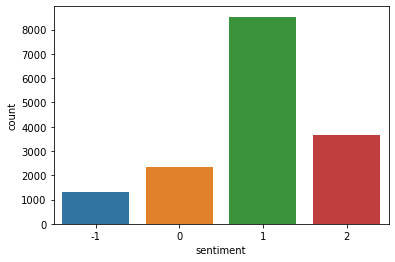

In [14]:
#Find The unique Sentiments and view their counts
ax = sns.countplot(x="sentiment", data=df)

We can also plot a donut chart to know what percentage of tweets fall under each sentiment.

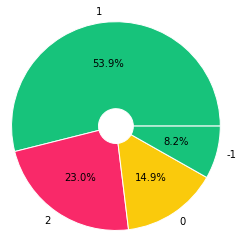

In [17]:
# A donut chart that shows the total percentage of tweet for each sentiment group
percent_class=class_df.message
labels= class_df.sentiment

colors = ['#17C37B','#F92969','#FACA0C']

my_pie,_,_ = plt.pie(percent_class,radius = 1.2,labels=labels,colors=colors,autopct="%.1f%%")

plt.setp(my_pie, width=1, edgecolor='white') 

plt.show()

Seeing the percentage of tweets for each sentiment as shown above, we were then curious, as you should be, to know the number of characters used by users in tweets for each sentiment.
An histogram was used in making this graphical repesentation as shown below;

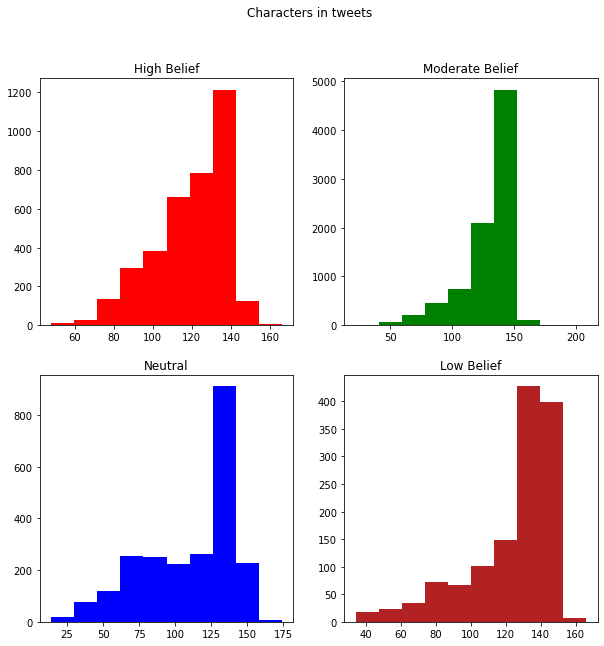

In [18]:
# Here we plot histograms to display the total number of characters in a tweet per sentiment
fig,((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,figsize=(10,10))
tweet_len=df[df['sentiment']==2]['message'].str.len()
ax1.hist(tweet_len,color='red')
ax1.set_title('High Belief')
tweet_len=df[df['sentiment']==1]['message'].str.len()
ax2.hist(tweet_len,color='green')
ax2.set_title('Moderate Belief')
tweet_len=df[df['sentiment']==0]['message'].str.len()
ax3.hist(tweet_len,color='blue')
ax3.set_title('Neutral')
tweet_len=df[df['sentiment']==-1]['message'].str.len()
ax4.hist(tweet_len,color='firebrick')
ax4.set_title('Low Belief')
fig.suptitle('Characters in tweets')
plt.show()

Wow, that's a lot of characters used, seems people can't get their hands off their phones, so why don't we chaeck the amount of words used in tweets for each sentiment.
We'll represent this graphically using a histogram

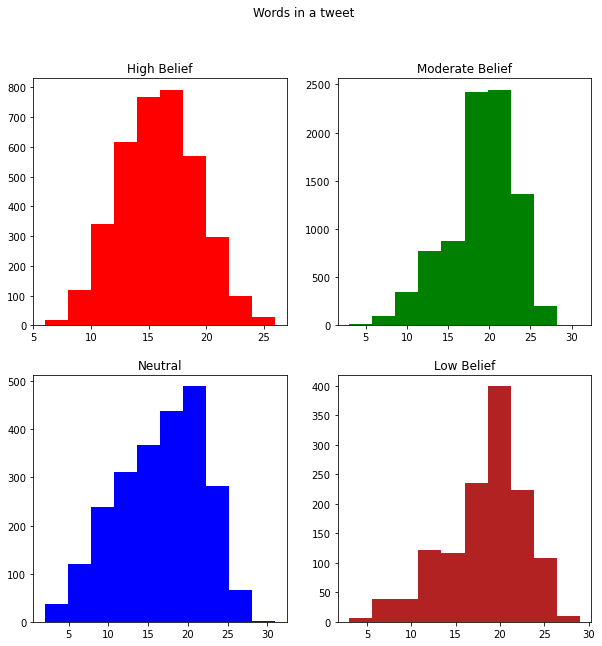

In [19]:
# Here we plot the total number of words in a tweet per sentiment
fig,((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,figsize=(10,10))
tweet_len=df[df['sentiment']==2]['message'].str.split().map(lambda x: len(x))
ax1.hist(tweet_len,color='red')
ax1.set_title('High Belief')
tweet_len=df[df['sentiment']==1]['message'].str.split().map(lambda x: len(x))
ax2.hist(tweet_len,color='green')
ax2.set_title('Moderate Belief')
tweet_len=df[df['sentiment']==0]['message'].str.split().map(lambda x: len(x))
ax3.hist(tweet_len,color='blue')
ax3.set_title('Neutral')
tweet_len=df[df['sentiment']==-1]['message'].str.split().map(lambda x: len(x))
ax4.hist(tweet_len,color='firebrick')
ax4.set_title('Low Belief')
fig.suptitle('Words in a tweet')
plt.show()

Hmmmm, this looks interesting, now i wonder how many average words there could be for each tweet per sentiment, let's check that out shall we?

Text(0.5, 0.98, 'Average word length in each tweet')

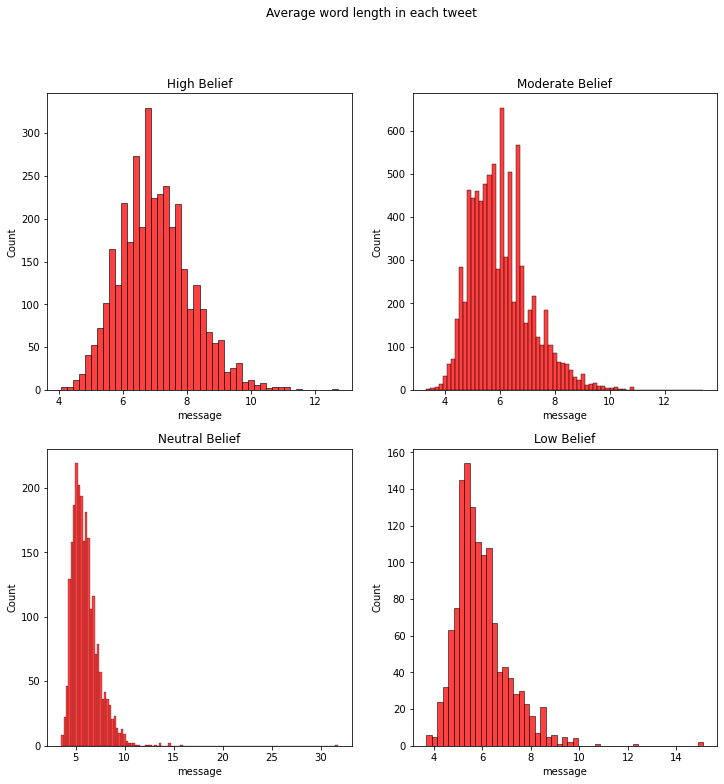

In [20]:
# Here we print the average tweet lenght per sentiment
fig,((ax1,ax2), (ax3,ax4))=plt.subplots(2,2,figsize=(12,12))
word=df[df['sentiment']==2]['message'].str.split().apply(lambda x : [len(i) for i in x])
sns.histplot(word.map(lambda x: np.mean(x)),ax=ax1,color='red')
ax1.set_title('High Belief')
word=df[df['sentiment']==1]['message'].str.split().apply(lambda x : [len(i) for i in x])
sns.histplot(word.map(lambda x: np.mean(x)),ax=ax2,color='red')
ax2.set_title('Moderate Belief')
word=df[df['sentiment']==0]['message'].str.split().apply(lambda x : [len(i) for i in x])
sns.histplot(word.map(lambda x: np.mean(x)),ax=ax3,color='red')
ax3.set_title('Neutral Belief')
word=df[df['sentiment']==-1]['message'].str.split().apply(lambda x : [len(i) for i in x])
sns.histplot(word.map(lambda x: np.mean(x)),ax=ax4,color='red')
ax4.set_title('Low Belief')
fig.suptitle('Average word length in each tweet')

<a id="four"></a>
## 4. Data Pre-processing
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section, the team will restructure the data for the project purpose... |

---

#### Pre-processing on the Train data

Data preprocessing is one of the critical steps in any machine learning project. It includes cleaning and formatting the data before feeding into a machine learning algorithm. For NLP, the preprocessing steps are comprised of the following tasks:

Tokenizing the string
Lowercasing
Removing stop words and punctuation
Stemming

#### Remove hyperlinks, Twitter marks, and emojis

We observe that the tweet dataset are two list of strings. The individual s trings contains tweeter handles, punctuations, emoticons, urls etc. We need to do some good preprocessing to work with them. Just before that, let's check their comparative lengths

In [21]:
# function to strip emojis from the tweets
#Ref: https://www.kaggle.com/code/eliasdabbas/how-to-create-a-python-regex-to-extract-emoji/notebook
# Ref: https://gist.github.com/Alex-Just/e86110836f3f93fe7932290526529cd1
# Ref: https://gist.github.com/Alex-Just/e86110836f3f93fe7932290526529cd1#gistcomment-3208085
# Ref: https://en.wikipedia.org/wiki/Unicode_block

def remove_emoji(text):
    EMOJI_PATTERN = re.compile(
        "(["
        "\U0001F1E0-\U0001F1FF"  # flags (iOS)
        "\U0001F300-\U0001F5FF"  # symbols & pictographs
        "\U0001F600-\U0001F64F"  # emoticons
        "\U0001F680-\U0001F6FF"  # transport & map symbols
        "\U0001F700-\U0001F77F"  # alchemical symbols
        "\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
        "\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
        "\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
        "\U0001FA00-\U0001FA6F"  # Chess Symbols
        "\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
        "\U00002702-\U000027B0"  # Dingbats
        "\U000024C2-\U0001F251"
        "])"
    )
    text = re.sub(EMOJI_PATTERN,  '', text)
    return text

In [22]:
def tweet_preprocessor(tweet):
    # remove the old style retweet text "RT"
    tweet_clean = re.sub(r'^RT[\s]+', '', tweet)

    # remove hashtags. We have to be careful here not to remove 
    # the whole hashtag because text of hashtags contains huge information. 
    # only remove the hash # sign from the word
    tweet_clean = re.sub(r'#', '', tweet_clean)

    # remove hyperlinks
    tweet_clean = re.sub(
        r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
        ,'',
        tweet_clean)

    # remove single numeric terms in the tweet. 
    tweet_clean = re.sub(r'\s[0-9]+\s', '', tweet_clean)

    # remove emojis from in the tweet
    tweet_clean = remove_emoji(tweet_clean)

    # remove punctions from the tweet
    tweet_clean = ''.join([l for l in tweet_clean if l not in string.punctuation])

    # convert tweet to lowercase and return it
    tweet_clean = tweet_clean.lower()
    
    # tokenize the tweet
    tokenizer = TweetTokenizer() #Instantiate the tokenizer class
    tweet_tokens = tokenizer.tokenize(tweet_clean)
    
    # remove stop words
    stopwords_english = stopwords.words('english')
    tweet_tokens_without_stopwords = [t for t in tweet_tokens if t not in stopwords_english]
    
    # stem the tweet
    #stemmer = PorterStemmer()
    #tweet_stems = ' '.join([stemmer.stem(t) for t in tweet_tokens])
    
    # stem the tweet
    lemma = WordNetLemmatizer()
    tweet_stems = ' '.join([lemma.lemmatize(t) for t in tweet_tokens])
    
    return tweet_stems

In [23]:
#Get the labels and targets
X = df['message']
y = df['sentiment']

In [24]:
vectorizer = CountVectorizer( # Instantiate the object
    preprocessor=tweet_preprocessor,
    ngram_range=(1,2) # with ngram_range of (1,2) for bag of words
) 
vectorizer.fit(X) #build vocabulary for training
X_tokenized = vectorizer.transform(X) #encode the text data 

# scale the encoded text data 
scaler = MaxAbsScaler() # Instantiate the object
X_scaled = scaler.fit_transform(X_tokenized)

#### Resampling Data

<a id="five"></a>
## 5. Model Building
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section,the team would design models for the classification task. |

---

We split our train data into test and train splits using the scaled values for the newly selected features.

In [26]:
#Split the labels and target into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3)

So we have decided to try out two classification models for this task; `LogisticRegression` and `SVM`.
We'll then go ahead to fit them into our training sets so the modeling process can kick off!

In [27]:
log_clf = LogisticRegression(multi_class='ovr') #Instantiate the model object
log_clf.fit(X_train, y_train) # train the model

LogisticRegression(multi_class='ovr')

In [28]:
svm_clf = SVC(gamma='auto') #Instantiate the model object
svm_clf.fit(X_train, y_train) # train the model

SVC(gamma='auto')

## HYPER-PARAMETER TUNING

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section, we will compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [29]:
log_score = log_clf.score(X_test, y_test)
print('Logistic f_score: ', log_score)
svm_score = svm_clf.score(X_test, y_test)
print('SVM f_score: ', svm_score)

Logistic f_score:  0.7431521281078803
SVM f_score:  0.5444584913611462


In [30]:
y_pred_log = log_clf.predict(X_test) # predict the target for the y_test
y_pred_svm = svm_clf.predict(X_test) # predict the target for the y_test

# find the accurancy of the model
print('Logistic Model accurancy: ', accuracy_score(y_test, y_pred_log))
print('Logistic Model f1 Score: ', f1_score(y_test, y_pred_log, average='weighted'))

# find the accurancy of the model
print('SVM Model accurancy: ', accuracy_score(y_test, y_pred_svm))
print('SVM Model f1 Score: ', f1_score(y_test, y_pred_svm, average='weighted'))

Logistic Model accurancy:  0.7431521281078803
Logistic Model f1 Score:  0.7259788630690278
SVM Model accurancy:  0.5444584913611462
SVM Model f1 Score:  0.3838692337454848


In [31]:
# Find the classification matrix to the model's metrics
print('Logistic classification Report')
print(classification_report(y_test, y_pred_log))
print('SVM classification Report')
print(classification_report(y_test, y_pred_svm))

Logistic classification Report
              precision    recall  f1-score   support

          -1       0.89      0.34      0.49       384
           0       0.63      0.38      0.48       662
           1       0.75      0.89      0.81      2584
           2       0.75      0.76      0.75      1116

    accuracy                           0.74      4746
   macro avg       0.76      0.59      0.63      4746
weighted avg       0.74      0.74      0.73      4746

SVM classification Report
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00       384
           0       0.00      0.00      0.00       662
           1       0.54      1.00      0.71      2584
           2       0.00      0.00      0.00      1116

    accuracy                           0.54      4746
   macro avg       0.14      0.25      0.18      4746
weighted avg       0.30      0.54      0.38      4746



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


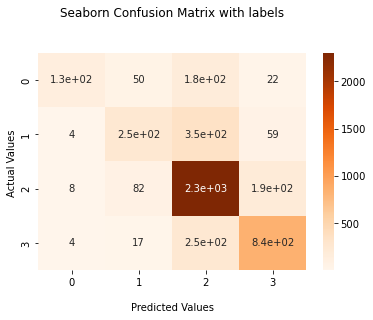

In [32]:
cf_matrix = confusion_matrix(y_test, y_pred_log)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Oranges')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
#ax.xaxis.set_ticklabels(['Setosa','Versicolor', 'Virginia'])
#ax.yaxis.set_ticklabels(['Setosa','Versicolor', 'Virginia'])

## Display the visualization of the Confusion Matrix.
plt.show()

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

## KAGGLE SUBMISSION

In [33]:
test_tokenized = vectorizer.transform(test_df['message'])

In [34]:
test_scaled = scaler.fit_transform(test_tokenized)

In [35]:
test_pred = log_clf.predict(test_scaled)

In [37]:
results_df = pd.DataFrame(test_pred.tolist(), index = test_df.index, columns=['sentiment'])

In [38]:
results_df.head()

,sentiment
tweetid,
169760,1
35326,1
224985,1
476263,1
872928,0


In [39]:
results_df.to_csv('classification_predict.csv')